# Comparación de métodos de ordenamiento para la clasificación de resultados deportivos por puntuación o tiempo

Importaciones

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time

## Métodos de ordenamiento utilizados

### MergeSort

In [3]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = mergeSort(left_half)
    right_half = mergeSort(right_half)

    return merge(left_half, right_half)


def merge(left, right):
    result = []
    left_index = right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index][1] <= right[right_index][1]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    while left_index < len(left):
        result.append(left[left_index])
        left_index += 1

    while right_index < len(right):
        result.append(right[right_index])
        right_index += 1

    return result

### Heap Sort

In [4]:
def heapify(arr, n, i):
    largest = i  
    left = 2 * i + 1  
    right = 2 * i + 2 

    if left < n and arr[left][1] > arr[largest][1]:
        largest = left

    if right < n and arr[right][1] > arr[largest][1]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i] 
        heapify(arr, n, largest) 

def heapSort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0) 

### Tim Sort

In [5]:
def timSort(arr):
    min_run = 32
    n = len(arr)

    for i in range(0, n, min_run):
        insertionSort(arr, i, min((i + min_run - 1), (n - 1)))

    size = min_run
    while size < n:
        for start in range(0, n, size * 2):
            mid = start + size - 1
            end = min((start + size * 2 - 1), (n - 1))

            merged = mergeTim(arr, start, mid, end)
            arr[start:start + len(merged)] = merged

        size *= 2

    return arr

def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        key_item = arr[i]
        j = i - 1
        while j >= left and arr[j][1] > key_item[1]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_item

def mergeTim(arr, start, mid, end):
    left = arr[start:mid + 1]
    right = arr[mid + 1:end + 1]

    left_cursor, right_cursor = 0, 0
    merged = []

    while left_cursor < len(left) and right_cursor < len(right):
        if left[left_cursor][1] <= right[right_cursor][1]:
            merged.append(left[left_cursor])
            left_cursor += 1
        else:
            merged.append(right[right_cursor])
            right_cursor += 1

    merged += left[left_cursor:]
    merged += right[right_cursor:]

    return merged


### Funciones para calcular el tiempo de rendimiento de diferentes métodos de ordenamiento

Función para calcular el rendimiento

In [6]:
def methodsPerformance(methods_list, size, lists):
    results = {method.__name__: [] for method in methods_list}

    for method in methods_list:
        times = []
        for data_list in lists:
            test_list = data_list[:size]
            start = time.time()
            method(test_list)
            end = time.time()
            times.append(end - start)
        results[method.__name__] = times

    return results

def calculateAverages(results, sizes_data):
    averages = {method: [] for method in results[next(iter(sizes_data))].keys()}
    global_averages = {method: 0 for method in averages}

    for size in sizes_data:
        for method in averages.keys():
            avg_time = sum(results[size][method]) / len(results[size][method])
            averages[method].append(avg_time)
            global_averages[method] += avg_time

    for method in global_averages:
        global_averages[method] /= len(sizes_data)

    return averages, global_averages

Función para mostrar resultados de los cálculos de rendimiento

In [7]:
def showResults(results, sizes, table_names, averages):
    for size in sizes:
        print(f"\n\nGrafico y tabla para el conjunto de tamaño {size}:\n")
        plt.figure()
        for method, times in results[size].items():
            plt.plot(table_names, times, label=method)

        plt.xlabel('Conjunto de Datos')
        plt.ylabel('Tiempo (segundos)')
        plt.title(f'Rendimiento de métodos de ordenamiento para tamaño de datos {size}')
        plt.legend()
        plt.show()

        data = {'Conjunto de Datos': table_names}
        for method, times in results[size].items():
            data[method] = times

        df = pd.DataFrame(data)
        print(df)

    print("\n\nGrafico y tabla para el conjunto de tamaño {size}:\n")
    plt.figure()
    for method, avg_times in averages.items():
        plt.plot(sizes, avg_times, label=method)

    plt.xlabel('Tamaño de Datos')
    plt.ylabel('Tiempo Promedio (segundos)')
    plt.title('Promedio de tiempo de métodos de ordenamiento')
    plt.legend()
    plt.show()

    avg_data = {'Tamaño de Datos': sizes}
    for method, avg_times in averages.items():
        avg_data[method] = avg_times

    avg_df = pd.DataFrame(avg_data)
    print("\nTabla de Promedios:\n")
    print(avg_df)

### Algunas otras funciones utilizadas

In [8]:
import random

def toSeconds(time):
    if '-' in time: 
        return None  
    else:
        hours, minutes, seconds = map(int, time.split(':'))
        time_in_seconds = hours * 3600 + minutes * 60 + seconds
        return time_in_seconds

## Clasificación de resultados por tiempo

### Descarga del dataset desde Kaggle

Decidimos utilizar un conjunto de datos de Kaggle ([Finishers Boston Marathon 2015, 2016 & 2017](https://www.kaggle.com/datasets/rojour/boston-results/data?select=marathon_results_2016.csv)) para llevar a cabo pruebas de rendimiento con los métodos de ordenamiento seleccionados. Este conjunto de datos proporciona información sobre los tiempos finales en diversas longitudes de corredores en la Maratón de Boston de 2016.

In [9]:
ruta_archivo = 'kaggle/marathon_results_2016.csv'
marathon_results = pd.read_csv(ruta_archivo)

marathon_results.head(200)

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,904,"Beauchamp, Thomas E",27,M,Smyrna,GA,USA,NaN,NaN,0:18:34,...,1:33:42,1:53:48,2:14:23,2:34:00,0:06:13,2:42:55,2:42:55,196,182,158
196,887,"Quick, Michael",28,M,Saint Louis,MO,USA,NaN,NaN,0:19:31,...,1:36:20,1:55:26,2:15:01,2:34:23,0:06:13,2:42:57,2:42:57,197,183,159
197,315,"Weston, Rob",27,M,Middletown,CT,USA,NaN,NaN,0:17:49,...,1:30:59,1:50:49,2:11:17,2:32:44,0:06:14,2:43:01,2:43:01,198,184,160
198,1164,"Gervais, David A Jr.",25,M,Nashua,NH,USA,NaN,NaN,0:18:47,...,1:33:05,1:52:59,2:13:30,2:33:55,0:06:14,2:43:02,2:43:02,199,185,161


### Preprocesamiento de los datos

Para facilitar las pruebas realizaremos un preprocesamiento de los datos, en el cual definiremos que columnas nos son útiles y eliminaremos valores que puedan interferir con el experimento.

Veamos el tamaño del dataset

In [10]:
print(f'Marathon results shape: {marathon_results.shape}')

Marathon results shape: (26630, 24)


Veamos de qué columnas tenemos y el tipo de dato almacenada en cada una de ellas

In [11]:
columns = marathon_results.columns

for column in columns:
  print('%20s'%column, marathon_results[column].dtype)

                 Bib object
                Name object
                 Age int64
                 M/F object
                City object
               State object
             Country object
             Citizen object
          Unnamed: 8 object
                  5K object
                 10K object
                 15K object
                 20K object
                Half object
                 25K object
                 30K object
                 35K object
                 40K object
                Pace object
           Proj Time object
       Official Time object
             Overall int64
              Gender int64
            Division int64


Para realizar las pruebas con los métodos de ordenamiento seleccionados necesitaremos solo las columnas: Bib, 5k, 10k, 20k, Half, 25K, 30K, 35K y 40k. Dichas columnas representan el número asignado al corredor y los distintos tiempos que demoró en recorrer las diferentes distancias.

In [12]:
columns_to_delete = ['Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 8', 'Pace', 'Proj Time', 
                     'Official Time', 'Overall', 'Gender', 'Division']

marathon_results = marathon_results.drop(columns = columns_to_delete)

In [13]:
columns = marathon_results.columns

for column in columns:
  print('%20s'%column, marathon_results[column].dtype)

                 Bib object
                  5K object
                 10K object
                 15K object
                 20K object
                Half object
                 25K object
                 30K object
                 35K object
                 40K object


In [14]:
marathon_results.head(200)

,Bib,5K,10K,15K,20K,Half,25K,30K,35K,40K
0,5,0:15:47,0:31:20,0:47:07,1:03:14,1:06:45,1:19:15,1:34:17,1:50:24,2:05:59
1,1,0:15:47,0:31:21,0:47:08,1:03:14,1:06:46,1:19:15,1:34:17,1:50:24,2:05:59
2,6,0:15:46,0:31:20,0:47:07,1:03:13,1:06:44,1:19:15,1:34:45,1:50:48,2:06:47
3,11,0:15:46,0:31:21,0:47:07,1:03:14,1:06:46,1:19:16,1:34:45,1:50:48,2:06:47
4,14,0:15:46,0:31:21,0:47:08,1:03:14,1:06:46,1:19:18,1:34:46,1:51:30,2:08:11
...,...,...,...,...,...,...,...,...,...,...
195,904,0:18:34,0:37:01,0:55:36,1:14:32,1:18:42,1:33:42,1:53:48,2:14:23,2:34:00
196,887,0:19:31,0:38:58,0:58:26,1:17:38,1:21:45,1:36:20,1:55:26,2:15:01,2:34:23
197,315,0:17:49,0:35:42,0:53:51,1:12:22,1:16:25,1:30:59,1:50:49,2:11:17,2:32:44
198,1164,0:18:47,0:36:58,0:55:28,1:14:07,1:18:11,1:33:05,1:52:59,2:13:30,2:33:55


Ahora podemos ver que los tiempos están dados en formato horas:minutos:segundos, necesitamos hacer la conversión a segundos, así quedaríamos con números enteros un poco más trabajables.

In [15]:
time_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']

for column in time_columns:
    marathon_results[column] = marathon_results[column].apply(toSeconds)

marathon_results.head(200)

,Bib,5K,10K,15K,20K,Half,25K,30K,35K,40K
0,5,947.0,1880.0,2827.0,3794.0,4005.0,4755.0,5657.0,6624.0,7559.0
1,1,947.0,1881.0,2828.0,3794.0,4006.0,4755.0,5657.0,6624.0,7559.0
2,6,946.0,1880.0,2827.0,3793.0,4004.0,4755.0,5685.0,6648.0,7607.0
3,11,946.0,1881.0,2827.0,3794.0,4006.0,4756.0,5685.0,6648.0,7607.0
4,14,946.0,1881.0,2828.0,3794.0,4006.0,4758.0,5686.0,6690.0,7691.0
...,...,...,...,...,...,...,...,...,...,...
195,904,1114.0,2221.0,3336.0,4472.0,4722.0,5622.0,6828.0,8063.0,9240.0
196,887,1171.0,2338.0,3506.0,4658.0,4905.0,5780.0,6926.0,8101.0,9263.0
197,315,1069.0,2142.0,3231.0,4342.0,4585.0,5459.0,6649.0,7877.0,9164.0
198,1164,1127.0,2218.0,3328.0,4447.0,4691.0,5585.0,6779.0,8010.0,9235.0


Para facilitar las pruebas eliminaremos filas que contengan valores nulos (None, NaN).

In [16]:
nan = marathon_results.isna().sum()

print('Valores nulos por columna:')
print(nan)

Valores nulos por columna:
Bib      0
5K      52
10K     29
15K     14
20K     23
Half    17
25K     10
30K     24
35K     12
40K     14
dtype: int64


In [17]:
columns = marathon_results.columns
for column in columns:
    marathon_results = marathon_results.dropna(subset=[column])

nan = marathon_results.isna().sum()

print('Valores nulos por columna:')
print(nan)

Valores nulos por columna:
Bib     0
5K      0
10K     0
15K     0
20K     0
Half    0
25K     0
30K     0
35K     0
40K     0
dtype: int64


In [18]:
print(f'Marathon results shape: {marathon_results.shape}')

Marathon results shape: (26481, 10)


### Hora de probar

Para establecer un orden de llegada de los corredores en cada distancia según sus tiempos, generaremos listas de tuplas. Cada tupla contendrá el número del corredor y su respectivo tiempo de llegada. Esto con el fin de poder acceder a los datos de cada corredor de una manera más simple en caso de requerirlo.

In [19]:
times_5k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['5K'])]
times_10k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['10K'])]
times_15k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['15K'])]
times_20k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['20K'])]
times_half = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['Half'])]
times_25k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['25K'])]
times_30k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['30K'])]
times_35k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['35K'])]
times_40k = [(bib, tiempo) for bib, tiempo in zip(marathon_results['Bib'], marathon_results['40K'])]

Los tiempos de llegada ya se encuentran desordenados, pero para evitar sesgos, procederemos a aleatorizar estas listas.

In [20]:
lists = [times_5k, times_10k, times_15k, times_20k, times_half, times_25k, times_30k, times_35k, times_40k]

for l in lists:
    random.shuffle(l)
    print("Randomized list:", l[:10])

Randomized list: [('15441', 1466.0), ('18883', 1565.0), ('3153', 1244.0), ('19460', 1602.0), ('3793', 1265.0), ('10562', 1329.0), ('23524', 1742.0), ('3534', 1284.0), ('4193', 1308.0), ('8503', 1322.0)]
Randomized list: [('25945', 3704.0), ('4595', 2545.0), ('16962', 3044.0), ('30569', 3843.0), ('9864', 2976.0), ('24534', 3085.0), ('19342', 2942.0), ('11283', 2813.0), ('540', 2297.0), ('25708', 3580.0)]
Randomized list: [('19135', 4613.0), ('30810', 5597.0), ('13679', 4268.0), ('12950', 4289.0), ('10821', 4231.0), ('20829', 4577.0), ('9860', 4697.0), ('6890', 3883.0), ('5466', 3787.0), ('20184', 4792.0)]
Randomized list: [('31116', 6437.0), ('28365', 6682.0), ('27196', 8954.0), ('31281', 7149.0), ('15017', 5963.0), ('30064', 6970.0), ('9651', 5679.0), ('4686', 5298.0), ('26998', 9211.0), ('7498', 5436.0)]
Randomized list: [('201', 4476.0), ('21372', 6652.0), ('29644', 6407.0), ('22185', 6696.0), ('5487', 5360.0), ('20819', 6486.0), ('16829', 6120.0), ('21623', 7324.0), ('22593', 6894.0

Con el fin de preservar la integridad de los datos y evitar posibles errores o distorsiones en los resultados, crearemos copias de las listas que se utilizarán en cada una de las pruebas planificadas. Así nos aseguraremos que las listas sean las mismas ordenadas en cada uno de los métodos.

#### Pruebas y graficas



Grafico y tabla para el conjunto de tamaño 861:



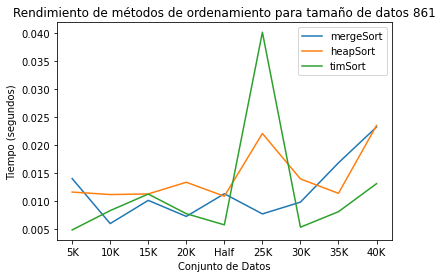

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.014008  0.011607  0.004849
1               10K   0.005980  0.011162  0.008299
2               15K   0.010122  0.011270  0.011250
3               20K   0.007258  0.013358  0.007743
4              Half   0.011305  0.010858  0.005754
5               25K   0.007706  0.022058  0.040130
6               30K   0.009805  0.013951  0.005335
7               35K   0.016829  0.011382  0.008103
8               40K   0.023220  0.023495  0.013102


Grafico y tabla para el conjunto de tamaño 1722:



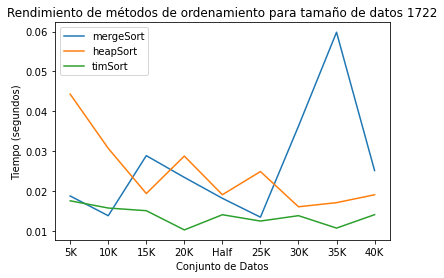

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.018757  0.044291  0.017551
1               10K   0.013810  0.030702  0.015737
2               15K   0.028871  0.019374  0.015070
3               20K   0.023423  0.028763  0.010250
4              Half   0.018176  0.019074  0.014058
5               25K   0.013447  0.024888  0.012472
6               30K   0.036269  0.016051  0.013822
7               35K   0.059814  0.017087  0.010709
8               40K   0.025137  0.019063  0.014072


Grafico y tabla para el conjunto de tamaño 2583:



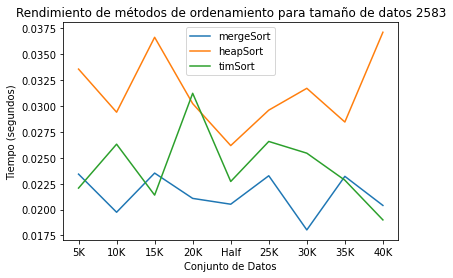

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.023425  0.033569  0.022077
1               10K   0.019744  0.029406  0.026317
2               15K   0.023525  0.036641  0.021398
3               20K   0.021081  0.030235  0.031232
4              Half   0.020519  0.026181  0.022715
5               25K   0.023267  0.029604  0.026580
6               30K   0.018037  0.031712  0.025448
7               35K   0.023210  0.028457  0.022840
8               40K   0.020401  0.037127  0.019003


Grafico y tabla para el conjunto de tamaño 3444:



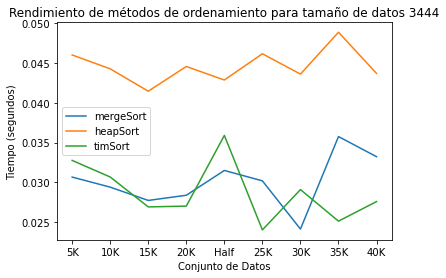

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.030668  0.046012  0.032765
1               10K   0.029404  0.044270  0.030677
2               15K   0.027735  0.041460  0.026922
3               20K   0.028387  0.044567  0.027023
4              Half   0.031502  0.042866  0.035904
5               25K   0.030196  0.046163  0.024030
6               30K   0.024136  0.043610  0.029096
7               35K   0.035759  0.048869  0.025131
8               40K   0.033232  0.043697  0.027590


Grafico y tabla para el conjunto de tamaño 4305:



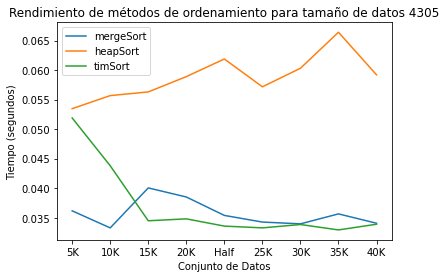

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.036161  0.053470  0.051894
1               10K   0.033273  0.055681  0.043799
2               15K   0.040044  0.056305  0.034478
3               20K   0.038507  0.058896  0.034803
4              Half   0.035386  0.061884  0.033576
5               25K   0.034260  0.057172  0.033273
6               30K   0.033957  0.060312  0.033843
7               35K   0.035644  0.066414  0.032929
8               40K   0.034059  0.059197  0.033892


Grafico y tabla para el conjunto de tamaño 5166:



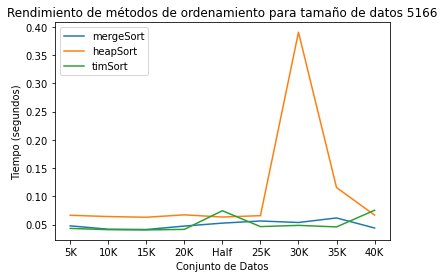

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.047718  0.066462  0.043184
1               10K   0.041774  0.064171  0.040984
2               15K   0.041206  0.062946  0.040523
3               20K   0.047359  0.067205  0.041483
4              Half   0.052544  0.063328  0.074471
5               25K   0.056326  0.065770  0.046393
6               30K   0.053672  0.390515  0.048553
7               35K   0.061714  0.115538  0.045843
8               40K   0.043917  0.066778  0.075321


Grafico y tabla para el conjunto de tamaño 6027:



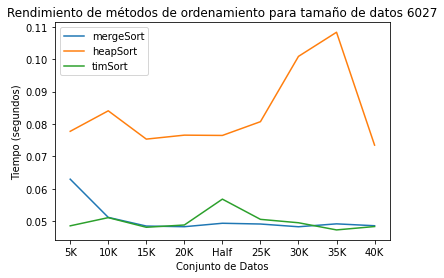

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.062959  0.077736  0.048557
1               10K   0.051171  0.084067  0.051087
2               15K   0.048488  0.075330  0.048112
3               20K   0.048287  0.076554  0.048816
4              Half   0.049351  0.076464  0.056799
5               25K   0.049118  0.080711  0.050559
6               30K   0.048269  0.100875  0.049508
7               35K   0.049169  0.108325  0.047296
8               40K   0.048586  0.073476  0.048339


Grafico y tabla para el conjunto de tamaño 6888:



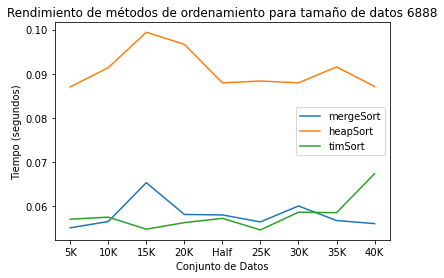

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.055110  0.087016  0.057056
1               10K   0.056528  0.091370  0.057525
2               15K   0.065326  0.099390  0.054794
3               20K   0.058135  0.096651  0.056283
4              Half   0.058026  0.087928  0.057249
5               25K   0.056442  0.088353  0.054631
6               30K   0.060054  0.087929  0.058642
7               35K   0.056756  0.091540  0.058533
8               40K   0.056057  0.087106  0.067367


Grafico y tabla para el conjunto de tamaño 7749:



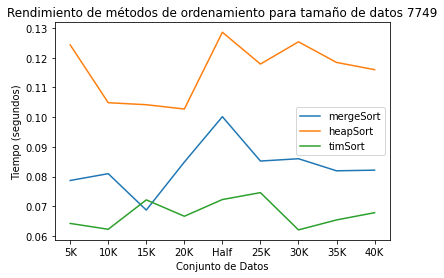

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.078691  0.124313  0.064237
1               10K   0.080982  0.104859  0.062269
2               15K   0.068730  0.104186  0.072166
3               20K   0.084891  0.102741  0.066653
4              Half   0.100158  0.128576  0.072279
5               25K   0.085230  0.117866  0.074604
6               30K   0.086013  0.125360  0.062055
7               35K   0.081948  0.118420  0.065415
8               40K   0.082162  0.115982  0.067850


Grafico y tabla para el conjunto de tamaño 8610:



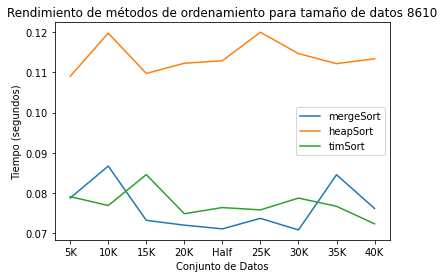

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.078740  0.109029  0.079088
1               10K   0.086685  0.119765  0.076867
2               15K   0.073184  0.109729  0.084564
3               20K   0.071983  0.112272  0.074830
4              Half   0.071066  0.112902  0.076361
5               25K   0.073676  0.119986  0.075779
6               30K   0.070800  0.114669  0.078724
7               35K   0.084528  0.112171  0.076677
8               40K   0.076135  0.113384  0.072309


Grafico y tabla para el conjunto de tamaño 9471:



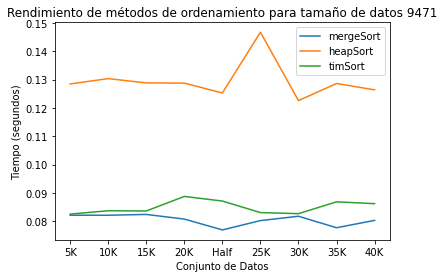

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.082111  0.128488  0.082514
1               10K   0.082101  0.130356  0.083683
2               15K   0.082384  0.128843  0.083603
3               20K   0.080744  0.128774  0.088741
4              Half   0.076916  0.125292  0.087115
5               25K   0.080207  0.146740  0.083040
6               30K   0.081749  0.122606  0.082657
7               35K   0.077688  0.128632  0.086844
8               40K   0.080282  0.126406  0.086188


Grafico y tabla para el conjunto de tamaño 10332:



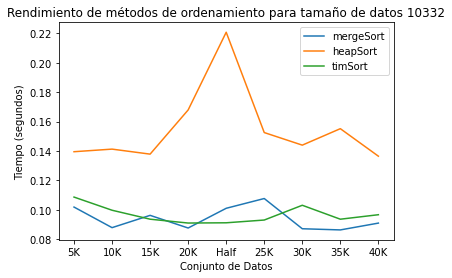

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.101942  0.139551  0.108726
1               10K   0.087963  0.141312  0.099785
2               15K   0.096309  0.137906  0.093700
3               20K   0.087710  0.167928  0.091093
4              Half   0.101111  0.220721  0.091257
5               25K   0.107748  0.152563  0.093131
6               30K   0.087213  0.144017  0.103166
7               35K   0.086417  0.155204  0.093695
8               40K   0.091045  0.136514  0.096744


Grafico y tabla para el conjunto de tamaño 11193:



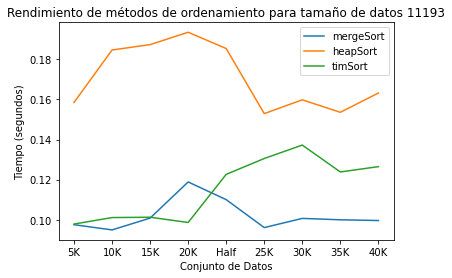

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.097498  0.158495  0.097819
1               10K   0.094894  0.184664  0.101056
2               15K   0.100785  0.187344  0.101224
3               20K   0.118825  0.193520  0.098613
4              Half   0.109995  0.185394  0.122614
5               25K   0.096055  0.152928  0.130524
6               30K   0.100639  0.159808  0.137223
7               35K   0.099946  0.153574  0.123812
8               40K   0.099580  0.163199  0.126464


Grafico y tabla para el conjunto de tamaño 12054:



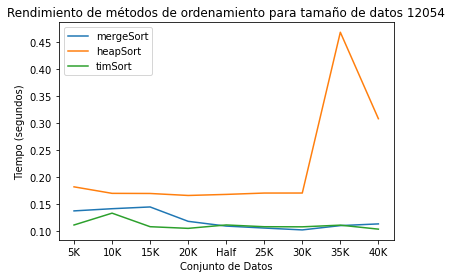

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.137681  0.182172  0.111603
1               10K   0.141721  0.170135  0.133494
2               15K   0.144981  0.169908  0.108447
3               20K   0.118393  0.166222  0.105365
4              Half   0.109579  0.168181  0.111674
5               25K   0.105951  0.170692  0.108401
6               30K   0.102493  0.170728  0.108211
7               35K   0.110468  0.468168  0.111312
8               40K   0.113622  0.308244  0.103929


Grafico y tabla para el conjunto de tamaño 12915:



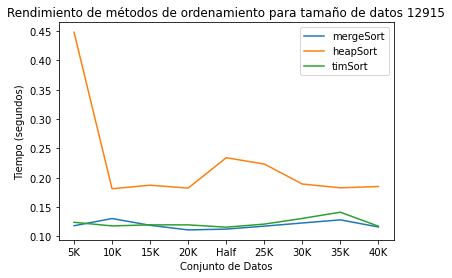

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.118158  0.447942  0.124051
1               10K   0.130445  0.181198  0.117856
2               15K   0.118899  0.187272  0.119682
3               20K   0.111045  0.182293  0.119658
4              Half   0.112411  0.234073  0.115721
5               25K   0.117487  0.223362  0.120955
6               30K   0.122847  0.189247  0.130626
7               35K   0.128174  0.182815  0.141251
8               40K   0.116084  0.185000  0.117356


Grafico y tabla para el conjunto de tamaño 13776:



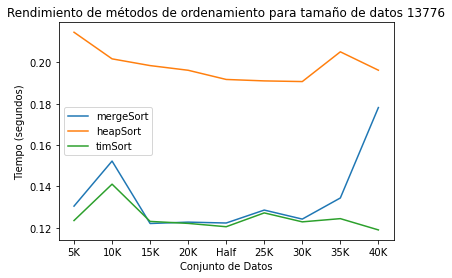

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.130465  0.214648  0.123482
1               10K   0.152274  0.201765  0.141096
2               15K   0.122051  0.198503  0.123060
3               20K   0.122712  0.196240  0.122104
4              Half   0.122287  0.191791  0.120488
5               25K   0.128553  0.191092  0.127182
6               30K   0.124185  0.190769  0.122847
7               35K   0.134412  0.205170  0.124404
8               40K   0.178183  0.196267  0.118944


Grafico y tabla para el conjunto de tamaño 14637:



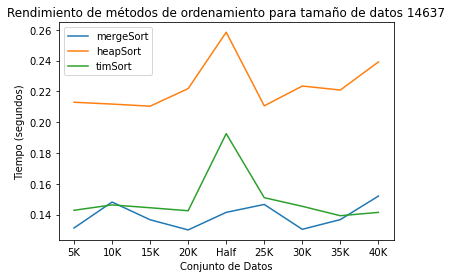

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.131314  0.212944  0.142800
1               10K   0.148154  0.211758  0.146304
2               15K   0.136655  0.210385  0.144455
3               20K   0.130062  0.221803  0.142513
4              Half   0.141456  0.258388  0.192561
5               25K   0.146598  0.210627  0.150999
6               30K   0.130457  0.223475  0.145388
7               35K   0.136764  0.220873  0.139283
8               40K   0.152009  0.239086  0.141448


Grafico y tabla para el conjunto de tamaño 15498:



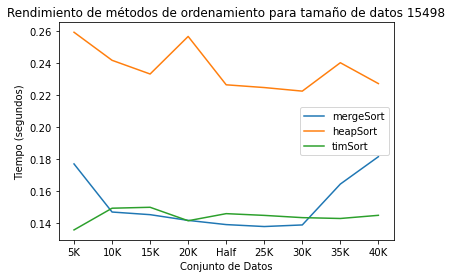

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.176949  0.259175  0.135745
1               10K   0.146913  0.241651  0.149297
2               15K   0.145267  0.233096  0.149881
3               20K   0.141692  0.256557  0.141477
4              Half   0.139070  0.226357  0.145904
5               25K   0.137856  0.224639  0.144819
6               30K   0.138852  0.222409  0.143416
7               35K   0.164373  0.240141  0.142883
8               40K   0.181469  0.227116  0.144858


Grafico y tabla para el conjunto de tamaño 16359:



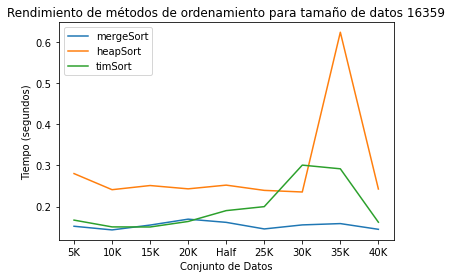

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.151970  0.280171  0.166925
1               10K   0.143048  0.240964  0.150376
2               15K   0.154850  0.251087  0.150176
3               20K   0.169222  0.243021  0.163596
4              Half   0.161456  0.252077  0.190032
5               25K   0.145434  0.239297  0.199714
6               30K   0.155248  0.235359  0.300776
7               35K   0.158435  0.624225  0.291819
8               40K   0.144524  0.242631  0.161805


Grafico y tabla para el conjunto de tamaño 17220:



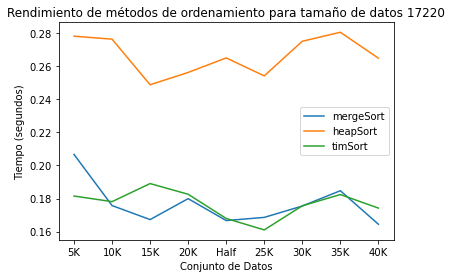

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.206682  0.278277  0.181495
1               10K   0.175735  0.276460  0.178116
2               15K   0.167245  0.248868  0.189052
3               20K   0.179926  0.256314  0.182572
4              Half   0.166662  0.265122  0.167924
5               25K   0.168577  0.254239  0.160996
6               30K   0.175448  0.275198  0.175598
7               35K   0.184728  0.280654  0.182409
8               40K   0.164433  0.264971  0.174222


Grafico y tabla para el conjunto de tamaño 18081:



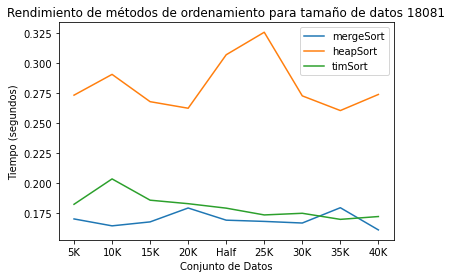

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.170131  0.273411  0.182348
1               10K   0.164360  0.290745  0.203528
2               15K   0.167665  0.267978  0.185779
3               20K   0.179254  0.262504  0.182858
4              Half   0.169104  0.307127  0.179132
5               25K   0.168068  0.325912  0.173471
6               30K   0.166718  0.272823  0.174849
7               35K   0.179492  0.260570  0.169776
8               40K   0.160968  0.273997  0.172131


Grafico y tabla para el conjunto de tamaño 18942:



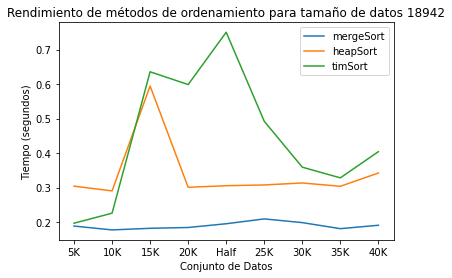

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.188247  0.303938  0.196515
1               10K   0.177091  0.290224  0.225620
2               15K   0.181750  0.594276  0.635567
3               20K   0.184097  0.300697  0.598517
4              Half   0.194994  0.305265  0.750217
5               25K   0.209006  0.307456  0.492122
6               30K   0.198253  0.313210  0.358968
7               35K   0.180728  0.303608  0.328034
8               40K   0.190586  0.342021  0.403979


Grafico y tabla para el conjunto de tamaño 19803:



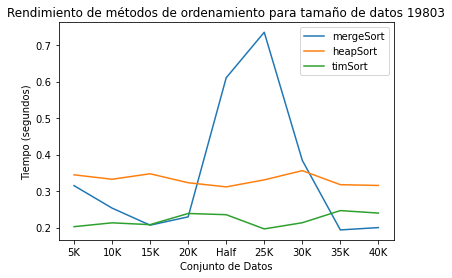

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.314880  0.344499  0.202493
1               10K   0.253384  0.332410  0.213022
2               15K   0.206552  0.347436  0.208028
3               20K   0.229383  0.322881  0.238630
4              Half   0.610395  0.311454  0.235322
5               25K   0.735105  0.330724  0.196348
6               30K   0.384197  0.355962  0.213269
7               35K   0.193600  0.317511  0.246548
8               40K   0.199955  0.315373  0.239703


Grafico y tabla para el conjunto de tamaño 20664:



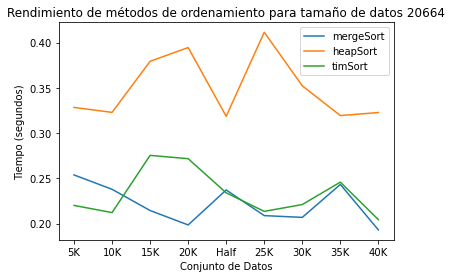

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.253789  0.328307  0.220104
1               10K   0.237894  0.322860  0.212186
2               15K   0.214474  0.379260  0.275374
3               20K   0.198555  0.394446  0.271708
4              Half   0.237164  0.318505  0.234016
5               25K   0.208855  0.411337  0.213523
6               30K   0.206898  0.352160  0.221074
7               35K   0.243284  0.319315  0.245800
8               40K   0.193052  0.322671  0.204397


Grafico y tabla para el conjunto de tamaño 21525:



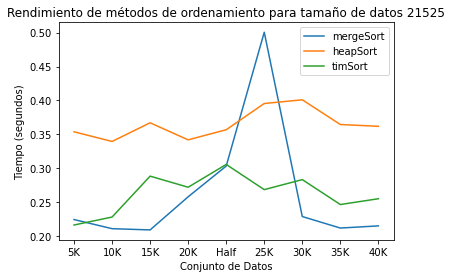

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.224355  0.353776  0.216277
1               10K   0.210878  0.339485  0.228036
2               15K   0.209061  0.367024  0.288355
3               20K   0.257910  0.341868  0.272011
4              Half   0.303209  0.356803  0.305622
5               25K   0.500560  0.395469  0.268487
6               30K   0.228772  0.400937  0.283231
7               35K   0.211817  0.364501  0.246508
8               40K   0.215003  0.361850  0.255050


Grafico y tabla para el conjunto de tamaño 22386:



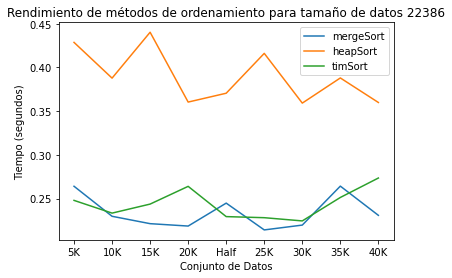

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.264035  0.428617  0.247881
1               10K   0.229690  0.387734  0.233322
2               15K   0.221255  0.440215  0.243654
3               20K   0.218517  0.360342  0.263928
4              Half   0.244754  0.370460  0.229321
5               25K   0.214102  0.416045  0.228084
6               30K   0.219625  0.359158  0.224399
7               35K   0.264190  0.387929  0.251230
8               40K   0.230777  0.359866  0.273471


Grafico y tabla para el conjunto de tamaño 23247:



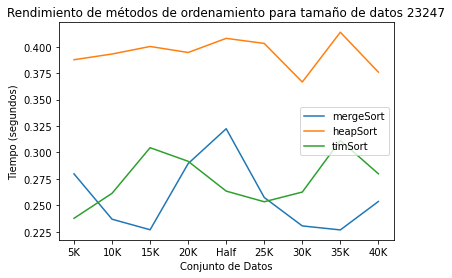

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.279764  0.387655  0.237767
1               10K   0.236915  0.393058  0.261422
2               15K   0.226942  0.400177  0.304511
3               20K   0.289504  0.394491  0.291647
4              Half   0.322439  0.407853  0.263481
5               25K   0.257464  0.403069  0.253411
6               30K   0.230572  0.366587  0.262581
7               35K   0.226797  0.413633  0.311429
8               40K   0.253668  0.375929  0.279857


Grafico y tabla para el conjunto de tamaño 24108:



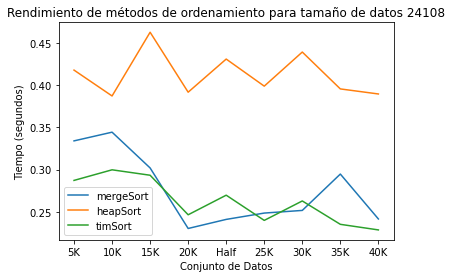

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.333911  0.417687  0.287113
1               10K   0.344207  0.387070  0.299656
2               15K   0.301862  0.462506  0.293234
3               20K   0.230213  0.391544  0.246434
4              Half   0.240959  0.430754  0.269623
5               25K   0.248451  0.398700  0.239782
6               30K   0.251589  0.439066  0.262788
7               35K   0.294626  0.395418  0.235128
8               40K   0.241485  0.389437  0.228508


Grafico y tabla para el conjunto de tamaño 24969:



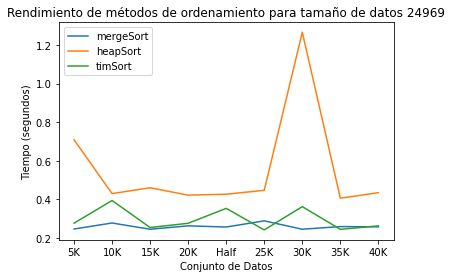

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.246472  0.708811  0.276645
1               10K   0.277633  0.429885  0.394219
2               15K   0.245310  0.460159  0.254217
3               20K   0.262925  0.421847  0.276166
4              Half   0.256803  0.426716  0.353421
5               25K   0.288760  0.446956  0.241821
6               30K   0.245334  1.265545  0.362409
7               35K   0.259174  0.406009  0.244903
8               40K   0.257739  0.434620  0.262779


Grafico y tabla para el conjunto de tamaño 25830:



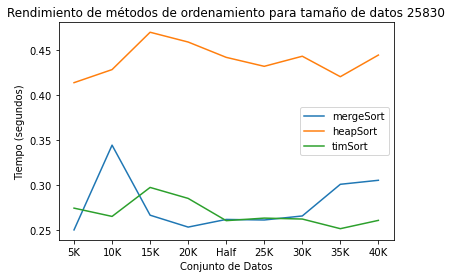

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.250314  0.413925  0.274524
1               10K   0.344493  0.428463  0.265324
2               15K   0.266675  0.469960  0.297523
3               20K   0.253458  0.459082  0.285324
4              Half   0.261954  0.442064  0.260605
5               25K   0.261347  0.432092  0.263436
6               30K   0.265822  0.443308  0.262399
7               35K   0.301005  0.420558  0.251684
8               40K   0.305461  0.444607  0.260910


Grafico y tabla para el conjunto de tamaño 26481:



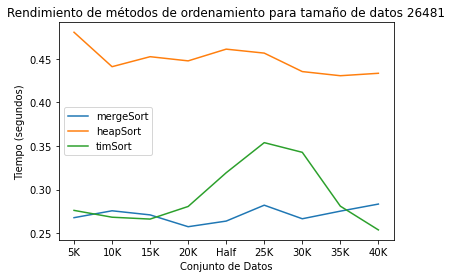

  Conjunto de Datos  mergeSort  heapSort   timSort
0                5K   0.267771  0.480432  0.276133
1               10K   0.275670  0.440920  0.268304
2               15K   0.270969  0.452394  0.266167
3               20K   0.257410  0.447598  0.280631
4              Half   0.263863  0.461056  0.319311
5               25K   0.282095  0.456504  0.353822
6               30K   0.266531  0.435327  0.342723
7               35K   0.275269  0.430569  0.280984
8               40K   0.283376  0.433364  0.253734


Grafico y tabla para el conjunto de tamaño {size}:



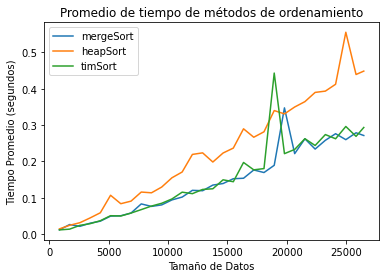


Tabla de Promedios:

    Tamaño de Datos  mergeSort  heapSort   timSort
0               861   0.011804  0.014349  0.011618
1              1722   0.026412  0.024366  0.013749
2              2583   0.021468  0.031437  0.024179
3              3444   0.030113  0.044613  0.028793
4              4305   0.035699  0.058815  0.036943
5              5166   0.049581  0.106968  0.050751
6              6027   0.050600  0.083726  0.049897
7              6888   0.058048  0.090809  0.058009
8              7749   0.083201  0.115811  0.067503
9              8610   0.076311  0.113767  0.077244
10             9471   0.080465  0.129571  0.084932
11            10332   0.094162  0.155079  0.096811
12            11193   0.102024  0.170992  0.115483
13            12054   0.120543  0.219383  0.111382
14            12915   0.119506  0.223689  0.123017
15            13776   0.135014  0.198472  0.124845
16            14637   0.139274  0.223260  0.149528
17            15498   0.152493  0.236793  0.144253
18       

In [21]:
sizes_data = [861, 1722, 2583, 3444, 4305, 5166, 6027, 6888, 7749, 8610, 9471, 10332, 11193, 12054, 12915, 13776, 14637, 15498, 16359, 17220, 18081, 18942, 19803, 20664, 21525, 22386, 23247, 24108, 24969, 25830, 26481]
table_names = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']
sort_methods = [mergeSort, heapSort, timSort]

all_results = {size: methodsPerformance(sort_methods, size, lists) for size in sizes_data}
averages, global_averages  = calculateAverages(all_results, sizes_data)

showResults(all_results, sizes_data, table_names, averages)

print("\n\n\nTabla de Promedios Globales:\n")
global_avg_df = pd.DataFrame([global_averages], index=["Promedio Global"])
print(global_avg_df)


#### IMPORTANTE: Pruebas y graficas con métodos de ordenamiento con Python

Se hicieron las pruebas teniendo en cuenta las siguientes características de Python:

- *Interpretación y Tipado Dinámico*: Es un lenguaje interpretado y de tipado dinámico, lo que significa que el intérprete de Python realiza tareas adicionales durante la ejecución para inferir tipos y llevar a cabo otras operaciones dinámicas. Esto puede resultar en un menor rendimiento en comparación con lenguajes compilados estáticamente como C o C++.

- *Gestión de Memoria:* Usa un recolector de basura para gestionar la memoria, lo que implica un sobrecoste en términos de tiempo de ejecución. En comparación con lenguajes de bajo nivel, el manejo automático de la memoria puede resultar en una menor eficiencia.

Las cuales podrían sesgar los resultados.